In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Excel_Project_Dataset.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   int64 
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(5), object(8)
memory usage: 104.3+ KB


In [4]:
# Explain the meaning of the values in gender, correct the mistake in the second column and explain the values
data['Gender'] = data['Gender'].map({'F':'Female', 'M':'Male'})
data = data.rename(columns={'Marital Status':'Martial Status', 'Purchased Bike':'Purchased_Bike', 'Commute Distance': 'Distance_Per_Mile'  })
data['Martial Status'] = data['Martial Status'].map({'S':'Single', 'M':'Married'})
#data['Distance_Per_Mile'] = data['Distance_Per_Mile'].replace(['10+ Miles'],['more than 10 miles'])
data.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Distance_Per_Mile,Region,Age,Purchased_Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
# Create sub_data to make a comparison between the buyers and non-buyers based on their gender 
Purchase_Per_Gender = data.iloc[:,[2,12]]
Purchase_Per_Gender = pd.DataFrame(Purchase_Per_Gender)
Purchase_Per_Gender.head()

,Gender,Purchased_Bike
0,Female,No
1,Male,No
2,Male,No
3,Male,Yes
4,Male,Yes


In [6]:
# Define the gender type, and the purchased status
gender_type = data['Gender'].unique()
buy_answers = data['Purchased_Bike'].unique()

In [7]:
# Define the buyers and non-buyers based on male and female, and the store it on a data frame
purchase_per_female = Purchase_Per_Gender.query('Gender == "Female" ')
purchase_per_male = Purchase_Per_Gender.query('Gender == "Male"')
purchase_per_female = np.array(purchase_per_female.value_counts())
purchase_per_male = np.array(purchase_per_male.value_counts())
Gender_Bar_Chart = pd.DataFrame([purchase_per_female , purchase_per_male],columns=pd.Index((buy_answers),name='Status'),index=gender_type)
Gender_Bar_Chart

Status,No,Yes
Female,258,243
Male,273,252


<Axes: title={'center': 'Purchase Status (males, females)'}>

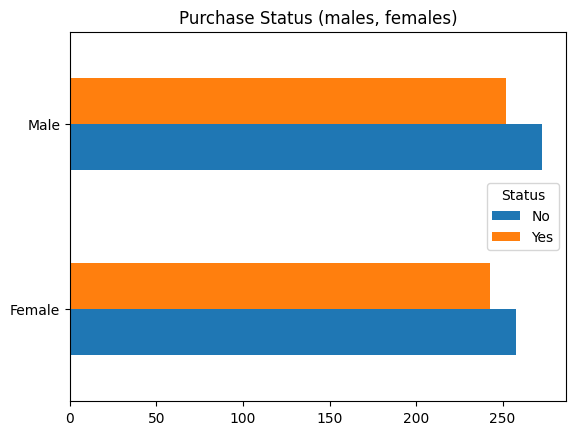

In [8]:
# Create vertical bar chart to plot the frame
Gender_Bar_Chart.plot(kind='barh', title='Purchase Status (males, females)')

<Axes: xlabel='Age', ylabel='Frequency'>

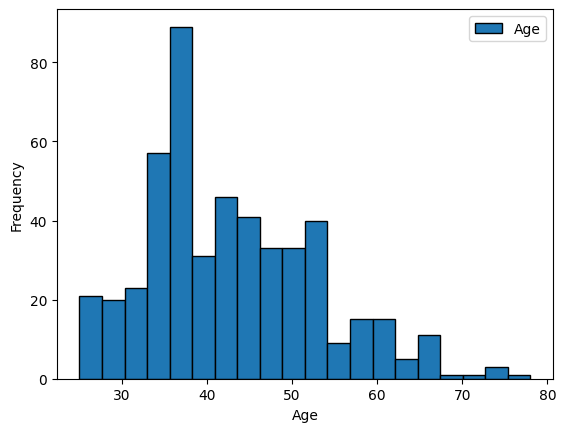

In [9]:
# The Age distribution of the buyers
Age_Distribution = data.iloc[:,[11,12]]
Buyer_Age = Age_Distribution.query(" Purchased_Bike == 'Yes' ")
Buyer_Age.plot(kind='hist', bins=20, edgecolor='black', xlabel='Age')

In [10]:
# The average income for the people who purchased or didn't purchase bikes
Average_Income = data.iloc[:,[3,12]]
average = Average_Income.groupby('Purchased_Bike')['Income'].mean().round(2)
average = pd.DataFrame(average)
average

,Income
Purchased_Bike,
No,55028.25
Yes,57474.75


,0
Occupation,
Clerical,95
Management,73
Manual,59
Professional,150
Skilled Manual,118


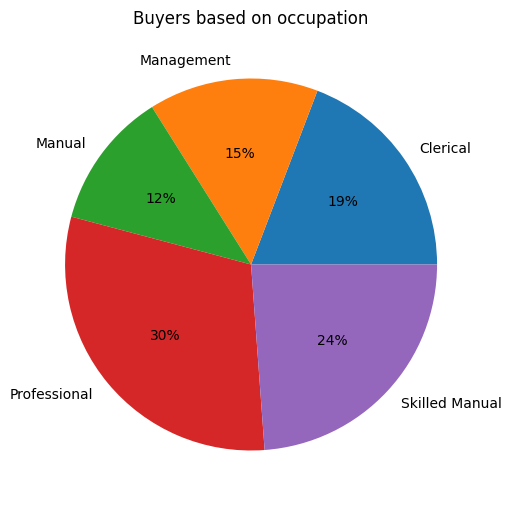

In [11]:
# The buyers based on occupation
Buyers_Per_Occupation = data.iloc[:,[6,12]]
Buyers_Per_Occupation = Buyers_Per_Occupation.query(' Purchased_Bike == "Yes" ')
buyer_Occupation = Buyers_Per_Occupation.groupby(['Occupation']).size()
buyer_Occupation.plot(kind='pie', autopct='%1.0f%%', title='Buyers based on occupation',
                       figsize=(6,8))
buyer_Occupation = pd.DataFrame(buyer_Occupation)
buyer_Occupation

<Axes: title={'center': 'Buyers per region'}>

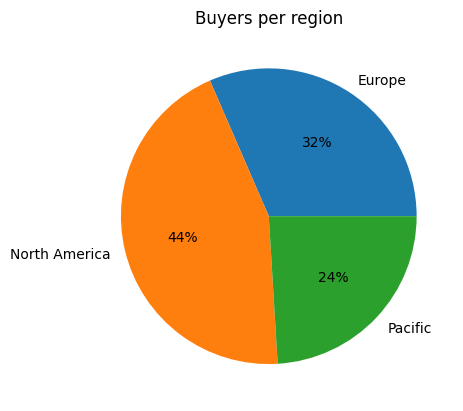

In [12]:
Buyers_Per_Region = data.iloc[:,[10,12]]
Region_Compare = Buyers_Per_Region.groupby(['Region','Purchased_Bike']).size()
# Show where the most buyers are from
region = Buyers_Per_Region.query('Purchased_Bike == "Yes" ')
buyer_region = region.groupby(['Region']).size()
buyer_region.plot(kind='pie', autopct='%1.0f%%', title='Buyers per region')

In [13]:
buyer_region = pd.DataFrame(buyer_region)
buyer_region

,0
Region,
Europe,156
North America,220
Pacific,119


In [14]:
Purchase_Status_Distance = data.iloc[:,[9,12]]
Purchase_Status_Distance['Distance_Per_Mile'] = Purchase_Status_Distance['Distance_Per_Mile'].replace(['10+ Miles'],['more than 10 miles'])
miles = Purchase_Status_Distance['Distance_Per_Mile'].unique()
miles = sorted(set(miles))
buyers_per_mile = Purchase_Status_Distance.query(" Purchased_Bike == 'Yes'")
buyers_per_mile = buyers_per_mile.groupby(['Distance_Per_Mile']).size()
non_buyers_per_mile = Purchase_Status_Distance.query(" Purchased_Bike == 'No'")
non_buyers_per_mile = non_buyers_per_mile.groupby(['Distance_Per_Mile']).size()

/tmp/ipykernel_28778/2864518431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Purchase_Status_Distance['Distance_Per_Mile'] = Purchase_Status_Distance['Distance_Per_Mile'].replace(['10+ Miles'],['more than 10 miles'])


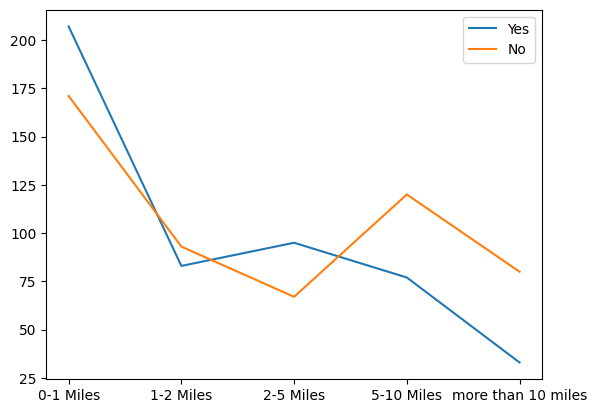

In [15]:
# Plot two subplots into one plot
# The lines represent the values of the buyers (yes) and non buyers (no) based on how far they are from home\work
figure, ax = plt.subplots()
ax.plot(buyers_per_mile)
ax.plot(non_buyers_per_mile)
plt.xticks(miles)
plt.legend(['Yes','No'])
plt.show()